In [2]:
import pysal
import numpy
import scipy
import pandas
import random
import shapefile as shp
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline
plt.style.use('ggplot')
pandas.set_option('display.max_rows', 100, "display.max_columns", 100)

import string
from gensim.models import Doc2Vec
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [3]:
def get_color(n):
    #        1.orange,   2.white,   3.yellow, 4.lgt-blue, 5.green,  6.blue,    7.fuchsia, 8.violet
    colors = ["#FF8F00", "#FFFFFF", "#FFFF00", "#00E5FF", "#76FF03", "#2979FF", "#F50057", "#9C27B0"]
    color = ""
    if n < 0:
        color = "#009688" # noise
    elif n < len(colors):
        color = colors[n]
    else:
        color = "#" + format(n**5, '06X')
    return color

In [4]:
%%time
model = Doc2Vec.load("../../../utils/pretrained/doc2vec/enwiki_dbow/doc2vec.bin")

CPU times: user 4.58 s, sys: 3.66 s, total: 8.24 s
Wall time: 10.1 s


In [5]:
df = pandas.read_csv("../dataset/crimes_census_5poi.csv", index_col=0, sep="\t")

In [6]:
pois_set = set(df["First_POI"].values) |  set(df["Second_POI"].values) | \
    set(df["Third_POI"].values) | set(df["Fourth_POI"].values) | set(df["Fifth_POI"].values)
pois_set = {x for x in pois_set if x == x}

In [7]:
poi_name = [poi.translate(None, string.punctuation).split() for poi in pois_set]
for i in range(len(poi_name)):
    poi_name[i] = [word.lower() for word in poi_name[i] if word.lower() in model.vocab]

embedded_poi = [model.infer_vector(poi) for poi in poi_name]

In [8]:
print poi_name[3]
model.most_similar(poi_name[3])

['bible', 'chapel']


[(u'church', 0.8042728304862976),
 (u'baptist', 0.7530302405357361),
 (u'churches', 0.7385671138763428),
 (u'christ', 0.7243289351463318),
 (u'biblical', 0.7232558727264404),
 (u'evangelists', 0.7141163349151611),
 (u'evangelist', 0.7139765620231628),
 (u'chapels', 0.7037547826766968),
 (u'testament', 0.6885421276092529),
 (u'evangelical', 0.6771351099014282)]

In [9]:
clusterer = KMeans(n_clusters=7)
# clusterer = DBSCAN(eps=0.1, min_samples=20)
clusterer.fit(embedded_poi)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
%%time
tsne = TSNE(n_components=2)
points = tsne.fit_transform(embedded_poi)

CPU times: user 2min 44s, sys: 10.5 s, total: 2min 55s
Wall time: 2min 54s


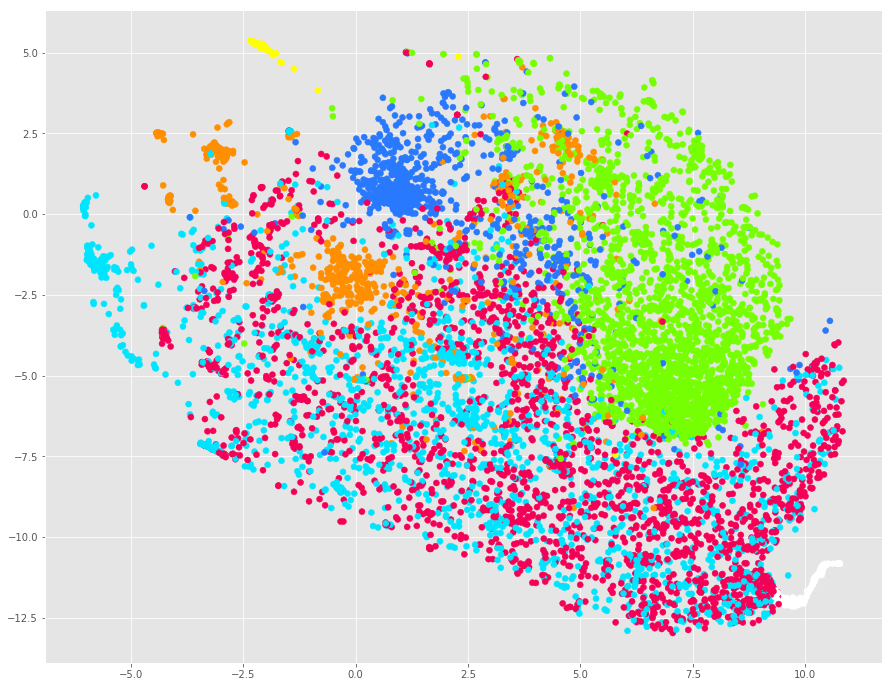

In [11]:
fig_size = [15, 12]
plt.rcParams["figure.figsize"] = fig_size
x = [point[0] for point in points]
y = [point[1] for point in points]
colors = [get_color(i) for i in clusterer.labels_]
plt.scatter(x, y, color=colors)
plt.show()

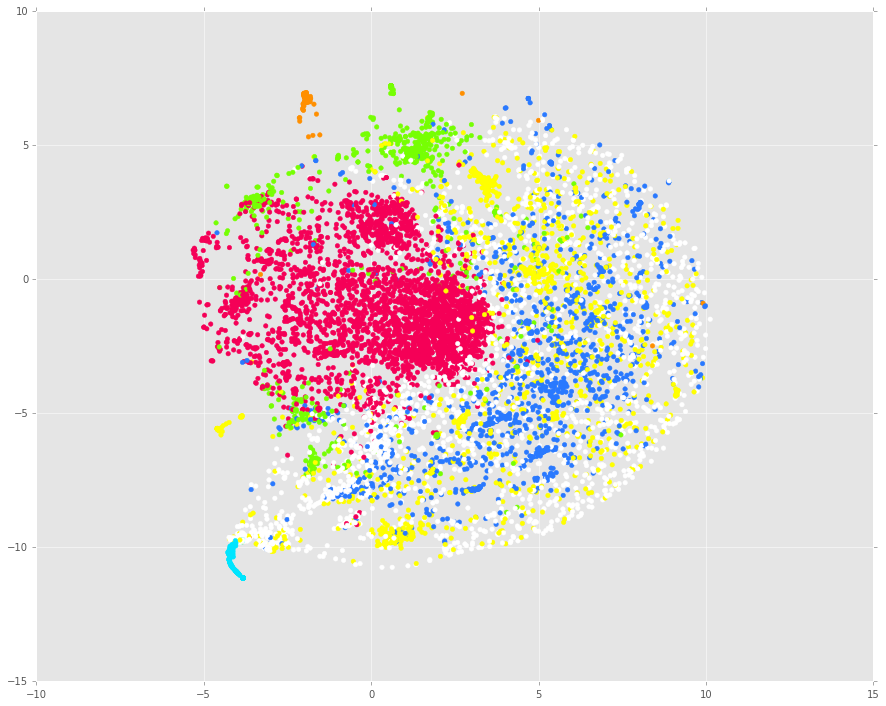

In [128]:
fig_size = [15, 12]
plt.rcParams["figure.figsize"] = fig_size
x = [point[0] for point in points]
y = [point[1] for point in points]
colors = [get_color(i) for i in clusterer.labels_]
plt.scatter(x, y, color=colors)
plt.show()

In [19]:
cluster_5 = [poi_name[i] for i in range(len(clusterer.labels_)) if clusterer.labels_[i] == 5]
cluster_5[:10]

[['pompano', 'masonry', 'corp'],
 ['roof', 'warranty', 'usa', 'inc'],
 ['joyner', 'designs', 'llc'],
 ['get', 'the', 'lead', 'out', 'llc'],
 ['piedmont', 'insurance'],
 ['nc', 'llc'],
 ['c2', 'creative', 'llc'],
 ['rasberry', 'agency', 'ltd', 'a', 'corp'],
 ['the', 'inertia', 'group', 'llc'],
 ['project', 'services', 'group', 'llc']]